Investors                Vertical
Tiger Global Management  E-Tech      1674.4
Name: Amount, dtype: float64

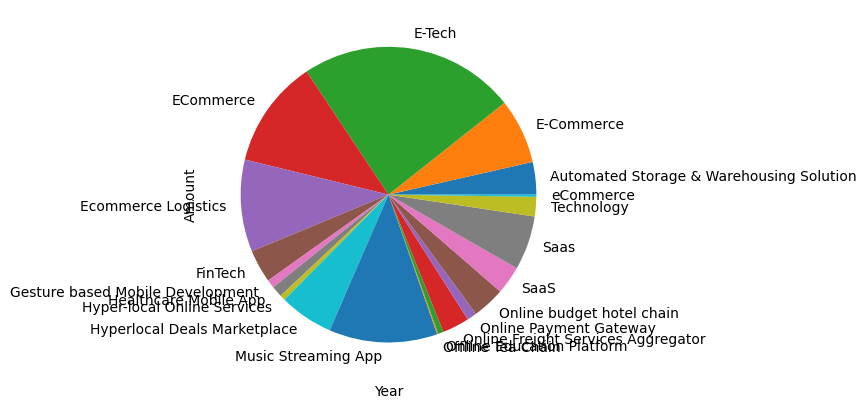

In [ ]:
import pandas as pd
df=pd.read_csv('/content/startup_funding.csv')
df['Investors Name'].fillna("Undisclosed")


#Investor wise analysis


#Dropping remarks column
df.drop(columns=['Remarks'],inplace=True)

#Setting Sr no as index
df.set_index('Sr No',inplace=True)

#Rename columns
df.rename(columns={
    'Date dd/mm/yyyy':'Date',
    'Startup Name':'Startup',
    'Industry Vertical':'Vertical',
    'City  Location':'City',
    'Investors Name':'Investors',
    'InvestmentnType':'Round',
    'Amount in USD':'Amount'
},inplace=True)

#Converting amount to indian rupees in Cr
df['Amount']=df['Amount'].fillna('0')
df['Amount']=df['Amount'].str.replace(',','')
df['Amount']=df['Amount'].str.replace('undisclosed','0')
df['Amount']=df['Amount'].str.replace('unknown','0')
df['Amount']=df['Amount'].str.replace('Undisclosed','0')
df=df[df['Amount'].str.isdigit()]
df['Amount']=df['Amount'].astype(float)


def to_inr(dollar):
  dollar=dollar*83.72/10000000
  return dollar

df['Amount']=df['Amount'].apply(to_inr)
df['Date']
df['Date']=pd.to_datetime(df['Date'],errors='coerce',dayfirst=True)
df['Date']

df=df.dropna(subset=['City','Investors','Vertical','Round','Amount','Startup','Date'])

#exporting data
df.to_csv('startup_cleaned.csv',index=False)

#Separating investors
set(df['Investors'].str.split(",").sum())

df['Investors']

#Recent 5 investments
recent5=df[df['Investors'].str.contains('Tiger Global Management')].head()[['Date','Startup','Vertical','City','Round','Amount']]

#Top5 investments
top5=df[df['Investors'].str.contains('Tiger Global Management')].groupby('Startup')['Amount'].sum().sort_values(ascending=False).head()

#Vertical wise top investments
count=df[df['Investors'].str.contains('Tiger Global Management')].groupby('Vertical')['Amount'].sum().plot(kind='pie')

#Stage wise investments
stage=df[df['Investors'].str.contains('Tiger Global Management')].groupby('Round')['Amount'].sum().plot(kind='pie')

#Year wise investments
df['Year']=df['Date'].dt.year
year_investment=df[df['Investors'].str.contains('Tiger Global Management')].groupby('Year')['Amount'].sum().plot()
year_investment


#To show similar investors
investor=df.groupby(['Investors','Vertical'])
total_investment=investor['Amount'].sum().sort_values(ascending=False)
vert = df[df['Investors'].str.contains('Tiger Global Management')].groupby('Vertical')['Amount'].sum().sort_values(ascending=False).head(1)
verticals=list(vert.index)
similar_investors=total_investment.loc[total_investment.index.get_level_values('Vertical').isin(verticals)]
similar_investors


In [172]:
# General Analysis
round(df['Amount'].sum())

#Max investment
df[df['Amount']==df['Amount'].max()]

df.groupby('Startup')['Amount'].max().sort_values(ascending=False).head(1).values[0]

#Average investment
df.groupby('Startup')['Amount'].sum().mean()

#total funded startups
num=df['Startup'].nunique()

df['Month']=df['Date'].dt.month
temp_df=df.groupby(['Year','Month'])['Amount'].sum().reset_index()
temp_df['x_axis']=temp_df['Month'].astype('str')+"-"+temp_df['Year'].astype('str')


temp_df[['Amount','x_axis']]


,Amount,x_axis
0,8200.374000,4-2015
1,2680.170220,5-2015
2,4365.947768,6-2015
3,12634.955424,7-2015
4,8906.267552,8-2015
5,12302.821440,9-2015
6,2134.533492,10-2015
7,7509.307260,11-2015
8,2560.601316,12-2015
9,5859.395360,1-2016


In [203]:
# Startup Analysis
df[df['Startup']=='Shuttl'][['Round','Investors','Date']]
df[df['Vertical']==df[df['Startup']=='Shuttl']['Vertical'].values[0]]

,Date,Startup,Vertical,SubVertical,City,Investors,Round,Amount,Year,Month
Sr No,,,,,,,,,,
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,67.381155,2020,1
61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,32650.800000,2019,8
88,2019-06-08,Vogo Automotive Pvt. Ltd.,Transportation,Dockless Scooter Rental Company,Karnataka,Alteria Capital,Debt Funding,30.005248,2019,6
111,2019-04-17,Shuttl,Transportation,Bus Aggregation,Gurugram,New Atlantic Ventures,Venture Round,41.860000,2019,4
